## Comparación de Modelos Predictivos

En este notebook se comparan dos modelos de clasificación entrenados sobre el mismo dataset de los datos de epilepsia:

- **Modelo 1:** Random Forest
- **Modelo 2:** Regresión Logística con regularización


### 1. Resultados de Precisión

In [39]:
# Extraer precisión de cada modelo usando la variable 'resultados' ya cargada
precision_modelo_1 = resultados[0].get('precision_total')
precision_modelo_2 = resultados[1].get('precision_total')
print(f"Precisión Modelo 1: {precision_modelo_1}")
print(f"Precisión Modelo 2: {precision_modelo_2}")

Precisión Modelo 1: 0.9706086956521739
Precisión Modelo 2: 0.8122608695652174


La precision del randomforest es mayor que la de la regresion logistica. Esto es un obvio indicador que su desempeño es mejor para la clasificacion de este conjunto de datos, sin embargo, estas estadisticas no son concluyentes por si solas.

### 2.Análisis comparativo de las metricas de aprendizaje y prediccion

### Comparacion visual de curvas de aprendizaje

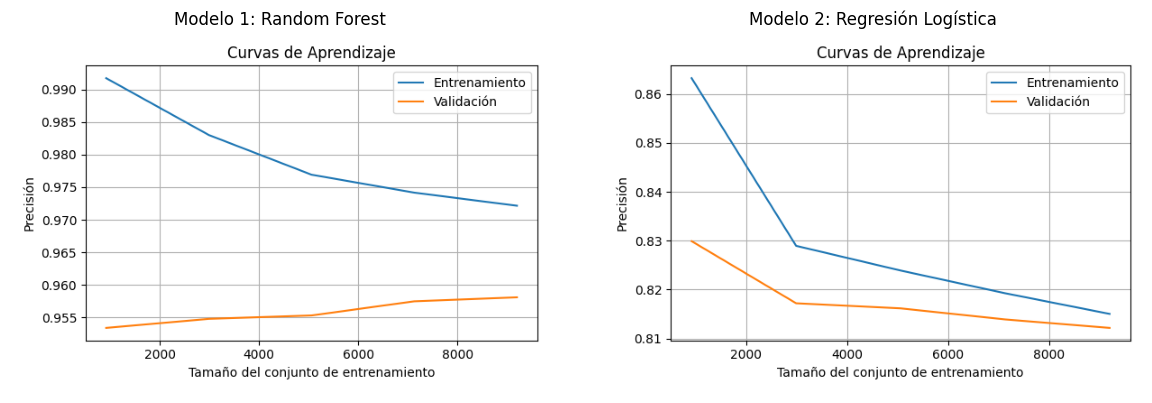

In [40]:
from IPython.display import Image, display
from PIL import Image as PILImage

# Cargar ambas imágenes
img1 = PILImage.open('anexos/modelo1_learning_curve.png')
img2 = PILImage.open('anexos/modelo2_learning_curve.png')

# Unir imágenes lado a lado
ancho_total = img1.width + img2.width
alto_max = max(img1.height, img2.height)
nueva_img = PILImage.new('RGB', (ancho_total, alto_max), (255, 255, 255))
nueva_img.paste(img1, (0, 0))
nueva_img.paste(img2, (img1.width, 0))

# Mostrar la imagen combinada
import matplotlib.pyplot as plt

# Crear una figura para mostrar ambas imágenes con títulos
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].imshow(img1)
axes[0].set_title('Modelo 1: Random Forest')
axes[0].axis('off')

axes[1].imshow(img2)
axes[1].set_title('Modelo 2: Regresión Logística')
axes[1].axis('off')

plt.tight_layout()
plt.show()


Ambas curvas muestran un comportamiento diferencial entre ambos modelos. 

El Randomforest muestra claros signos de overfitting entre la validancion y el entrenamiento. Mientras que la regresion logistica no muestra signos de ello, teniendo un sesgo mas bien bajo. 

El randomforest sin embargo, exhibe un mejor comportamiento en la validacion a medida que aumentan la cantidad de datos , a diferencia de  la regresion , lo cual indica que este modelo es mejor a la hora de generarlizar y predecir cuando los volumenes de datos son mayores.



### Comparacion de las matrices de confusion

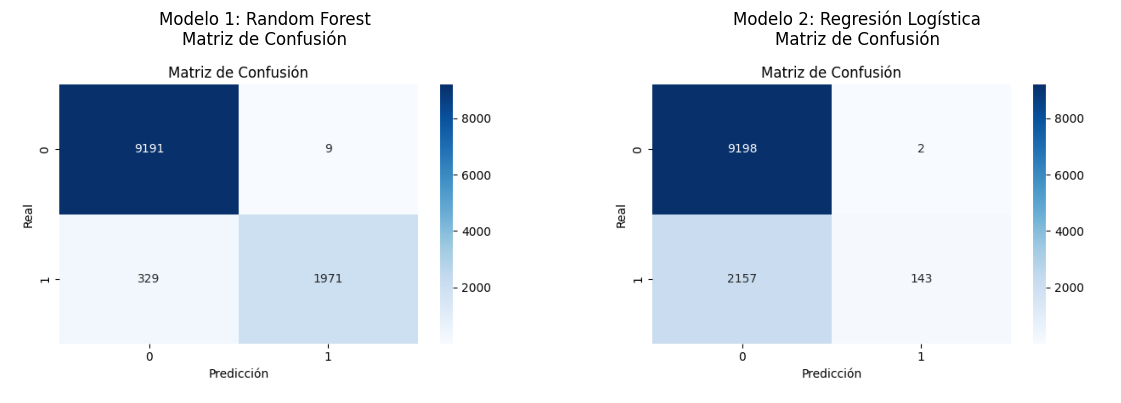

In [41]:
# Mostrar ambas matrices de confusión lado a lado
img1_cm = PILImage.open('anexos/modelo1_confusion_matrix.png')
img2_cm = PILImage.open('anexos/modelo2_confusion_matrix.png')

fig_cm, axes_cm = plt.subplots(1, 2, figsize=(12, 4))

axes_cm[0].imshow(img1_cm)
axes_cm[0].set_title('Modelo 1: Random Forest\nMatriz de Confusión')
axes_cm[0].axis('off')

axes_cm[1].imshow(img2_cm)
axes_cm[1].set_title('Modelo 2: Regresión Logística\nMatriz de Confusión')
axes_cm[1].axis('off')

plt.tight_layout()
plt.show()

In [42]:
import numpy as np

# Extraer matrices de confusión de los resultados
matriz1 = np.array(resultados[0]['matriz_confusion'])
print("Matriz de confusión Modelo 1 (Random Forest):")
print(matriz1)
print("\nMatriz de confusión Modelo 2 (Regresión Logística):")
print(matriz2)

# Calcular la diferencia porcentual relativa respecto a la matriz 2
diferencia_pct =abs(100 * (matriz2 - matriz1) / matriz1)
# Configurar numpy para mostrar los números en formato decimal con dos decimales
np.set_printoptions(precision=2, suppress=True)
print("Diferencia porcentual entre las matrices de confusión (%):")
print(np.round(diferencia_pct, 2))



Matriz de confusión Modelo 1 (Random Forest):
[[9191    9]
 [ 329 1971]]

Matriz de confusión Modelo 2 (Regresión Logística):
[[9198    2]
 [2157  143]]
Diferencia porcentual entre las matrices de confusión (%):
[[  0.08  77.78]
 [555.62  92.74]]


Las matrices de confusion muestran que las capacidades de prediccion de cada uno de los modelos  es muy diferente entre ambos modelos, existiendo grandes diferencias (que llegan al 500% en algunos casos) entre ellos, sobretodo en los falsos neagitvos, donde la regresion logistica demuestra ser peor en dicho sentido, lo cual demuestra qu esu capacidad de generalizar es limitada.

### Comparacion de curvas ROC  y AUC

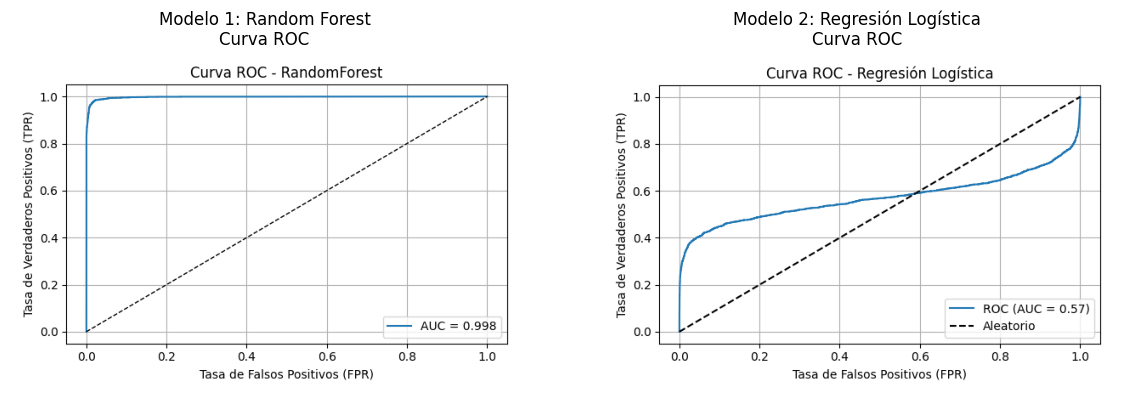

In [43]:
# Mostrar ambas curvas ROC lado a lado
img1_roc = PILImage.open('anexos/modelo1_roc_curve.png')
img2_roc = PILImage.open('anexos/modelo2_roc_curve.png')

fig_roc, axes_roc = plt.subplots(1, 2, figsize=(12, 4))

axes_roc[0].imshow(img1_roc)
axes_roc[0].set_title('Modelo 1: Random Forest\nCurva ROC')
axes_roc[0].axis('off')

axes_roc[1].imshow(img2_roc)
axes_roc[1].set_title('Modelo 2: Regresión Logística\nCurva ROC')
axes_roc[1].axis('off')

plt.tight_layout()
plt.show()

La curva ROC muestra que el modelo de regresión logística tiene un desempeño pobre (AUC = 0.57), apenas mejor que una predicción aleatoria. En cambio, el modelo Random Forest alcanza un AUC de 0.998, lo que indica una capacidad de clasificación excelente. Sin embargo, un valor tan alto sugiere posible overfitting, por lo que se recomienda validar con técnicas como cross-validation y revisar el balance de clases para asegurar una evaluación justa.